In [5]:
# Advanced Statistical Machine Learning & Pattern Recognition - CO495
# skeleton for CW1
# Written for Python 3.

In [6]:
import h5py
from scipy.io import savemat
import numpy as np
import csv
import matplotlib.pyplot as plt

try:
    %matplotlib inline
except NameError:
    # this is a terminal, that's fine.
    pass

(2, 2000)
[[ 7.96714603  9.02735559]
 [ 5.20891438  4.99047893]
 [ 7.19484019  1.62814244]
 [ 2.05777579  2.1137154 ]]
[2 1 3 ..., 2 2 1]
[512, 511, 435, 542]
0.256
[[ 1.0247685   0.00324863]
 [ 0.00324863  1.04889345]]
0.256
[[ 1.42782179  0.09898847]
 [ 0.09898847  0.8105149 ]]
0.2555
[[ 0.89775617 -0.24800043]
 [-0.24800043  1.3793532 ]]
0.2175
[[ 0.56781963  0.06749148]
 [ 0.06749148  0.61882552]]
0.271


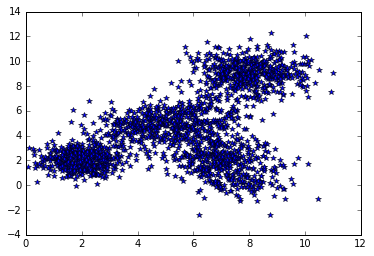

In [94]:
import numpy as np
from scipy import cluster
# load the file.
f = h5py.File('X.mat')
f.keys()

X = f.get('X').value
N = X.shape[1]
print(X.shape)
X_T = np.transpose(X)
init_centroid = np.array([[2,2],[5,5],[7,2],[8,9]], np.float32)
centroids, labels = cluster.vq.kmeans2(X_T,k=4, iter=100, thresh=1e-05, minit='random', missing='warn', check_finite=True)
print(centroids)
print(labels)
clusters = [0,0,0,0]
for i in range(N):
    clusters[labels[i]] += 1
    
print(clusters)
print(clusters[0]/float(N))
    
for l in range(4):
    cluster_samples = []
    for k in range(N):
        if labels[k] == l:
            cluster_samples.append(X_T[k])
    c = np.cov(np.transpose(np.array(cluster_samples)))
    print(c)
    print(np.divide(clusters[l],float(N)))
# cluster_samples2 = np.array(cluster_samples)
# print(cluster_samples2)

# for l in range(4):
#     c = np.cov(np.transpose(cluster_samples2[l]))
#     print(c)
# print(len(X[0,:]))
# optionally visualise the X matrix.
try:
    plt.plot(X[0, :], X[1, :], '*')
except:
    pass

# EM Init

In [95]:
from scipy import cluster
import numpy

def EMInit(X,K):
#     (X, K) 
    X_T = np.transpose(X)
    centroids, labels = cluster.vq.kmeans2(X_T, K, iter=50, thresh=1e-05, minit='random', missing='warn', check_finite=True)
    print(centroids)
    clusters = [0,0,0,0]
    for i in range(N):
        clusters[labels[i]] += 1
    
    print(clusters)
    print(clusters[0]/float(N))
    c = np.zeros((4,2,2))
    mc = [0.0,0.0,0.0,0.0]
    for l in range(4):
        cluster_samples = []
        for k in range(N):
            if labels[k] == l:
                cluster_samples.append(X_T[k])
        c[l] = np.cov(np.transpose(np.array(cluster_samples)))
        print(c)
        mc[l]=np.divide(clusters[l],float(N))
    params = {}
    for i in range(1, K + 1):
        nn = 'means_{}'.format(i)
        params[nn] = centroids[i-1]
        nn = 'covars_{}'.format(i)
        params[nn] = c[l-1]
        nn = 'mixCoeff_{}'.format(i)
        params[nn] = mc[l-1]
    print("init: ", params)
    return params

In [102]:
from scipy import cluster
import numpy

def EMInit_Random(X,K):
    return random_params_generator(K)

# EM E step

In [103]:
from scipy import stats
import numpy as np

def is_pos_semi_def(x):
    return np.all(np.linalg.eigvals(x) >= 0)

def EMEStep(X, K, params):
    # X, K, params
    # X is (2, 2000)
    # Z is N x k = 2000 x k
#     print(len(X[0,:]))
#     print(C)
    z = numpy.zeros((len(X[0,:]), K))
#     print("z shape:", z.shape)
    for n in range(len(X[0,:])):
        for k in range(K):
            pi_k = params['mixCoeff_{}'.format(k+1)]
            mu_k = params['means_{}'.format(k+1)]
            cov_k = params['covars_{}'.format(k+1)]
#             if not is_pos_semi_def(cov_k):
#                 cov_k_positivesemi = numpy.dot(cov_k, cov_k.transpose())
#             else:
#                 cov_k_positivesemi = cov_k
#             if np.linalg.cond(cov_k) < 1/sys.float_info.epsilon:
#                 print("fuck1!!!!")
#                 print(cov_k)
#             print("cov: ", cov_k)
            N_nk = stats.multivariate_normal.pdf(X[:, n], mean=mu_k, cov=cov_k)
            numerator = np.multiply(pi_k,N_nk) # 1x1
#             print("numerator shape: ", numerator.shape)
            z[n, k] = numerator
        denominator = z.sum(axis=1)[n] # 1x1
#         print("denominator shape: ", denominator.shape)
        n_row = np.divide(z[n,:], denominator)
#         print("n_row shape: ", n_row.shape) # 1xk
        z[n,:] = n_row
#     print('Please fill in the function and delete the comment!')
    return z

# EM M step

In [104]:
def EMMStep(X, K, E):
#     (X, K, resp)
    N = X.shape[1]
    D = X.shape[0]
#     print("D = ", D)
#     print("N = ", N)
#     print("K = ", K)
    E_sum_row = E.sum(axis=0) # k x 1
#     E_sum_row = numpy.reshape(E_sum_row, (1,K))
#     print("E_sum_row = ", E_sum_row.shape)
    pi = np.divide(E_sum_row, N) # k x 1
#     print("pi = ", pi)
#     print("pi.shape: ", pi.shape)
# E_sum_row =  (1, 4)
# pi =  (1, 4)
# mu_k shape:  (2,)
# diff.shape:  (2,)
# diff.shape:  (2, 1)
# diff_sq.shape:  (2, 2)
# numerator.shape:  (2, 2)
    mu = numpy.zeros((K, D)) # K x D
    E_T = numpy.transpose(E) # K x N
    X_T = numpy.transpose(X) # N x D
    mu = numpy.dot(E_T, X_T) # K x D
    cov = numpy.zeros((K, D, D)) # K x D x D
    for k in range(K):
        mu[k, :] = np.divide(mu[k, :], E_sum_row[k])
#         print("mu[k, :] ", mu[k, :])
        numerator = numpy.zeros((D, D)) # D x D
        for n in range(N):
            mu_k = mu[k, :] # 1 x D 
#             print("mu_k shape: ", mu_k.shape)
            diff = numpy.subtract(np.transpose(X[:, n]), mu_k) # 1 x D 
#             print("diff: ", diff)
            diff = numpy.reshape(diff, (2,1))
            diff_sq = numpy.dot(diff, numpy.transpose(diff)) # D x D
#             diff = numpy.reshape(mu_k, (1, D))
#             print("diff: ", diff)
#             diff_sq = numpy.dot(numpy.transpose(diff),diff) # D x D
#             print("diff_sq: ", diff_sq)
            numerator = numerator + numpy.multiply(E[n, k],diff_sq)
#             print("numerator.shape: ", numerator.shape)
        denominator = E_sum_row[k]
#         print("numerator: ", numerator)
#         print("denominator: ", denominator)
        covv = np.divide(numerator, denominator)
#         print("covv: ", covv)
        cov[k, :, :] = covv
#         print("cov_k: ", cov[k, :, :])
#     print("mu", mu)
    params = {}
    for i in range(1, K + 1):
        nn = 'means_{}'.format(i)
        params[nn] = mu[i-1]
        nn = 'covars_{}'.format(i)
        params[nn] = cov[i-1]
        nn = 'mixCoeff_{}'.format(i)
        params[nn] = np.array([pi[i-1]])
    return params

# GMM Demo

In [105]:
import numpy as py

# aux functions
def random_params_generator(K):
    params = {}
    for i in range(1, K + 1):
        nn = 'means_{}'.format(i)
        params[nn] = np.random.rand(2)
        nn = 'covars_{}'.format(i)
        x = np.random.rand(2, 2)
        params[nn] = np.dot(np.transpose(x), x)
        nn = 'mixCoeff_{}'.format(i)
        params[nn] = np.random.rand(1)
    return params


def convert_params_to_row(params, K):
    # accepts the params dict and converts it to a row to be exported.
    # The covars are flattened per row.
    row = []
    for var in ['means', 'covars', 'mixCoeff']:
        for i in range(1, K + 1):
            elems = params['{}_{}'.format(var, i)].flatten()
            row += [str(el) for el in elems]
    return row

# pp = random_params_generator(4)
# p = pp['means_1']
# print(p)

In [106]:
def GMMDemo(X, K=4):
    # accepts a 2 dimensional matrix X with the observed 
    # data and the K, which represents the number of clusters.
    # Please do not modify it!
    #
    # initialise the parameters
#     params = EMInit(X, K)
    params = EMInit_Random(X, K) 
    # params should be a dict() with the following format:
    # params['means_[i]'] -> [2x1 float] (i \in [1, K])
    # params['covars_[i]'] -> [2x2 float] (i \in [1, K])
    # params['mixCoeff_[i]'] -> [1x1 float] (i \in [1, K])
    print("init ", params)
    # EM algorithm
    # do not change the iterations --- keep them fixed.
    for i in range(50):
        # E step
        resp = EMEStep(X, K, params); # compute responsibilities, i.e., every \gamma(z_{n,k})

#         print("iter ", i, "  resp.shape: ", resp.shape)
        
        # M step
        params = EMMStep(X, K, resp) # update the values for the parameters
#         print("iter ", i,"  ", params)
    # comment out the line below once you have implemented 
    # the init code!
    # params = random_params_generator(K)
    # save the final values for the parameters
    print(params)
#     savemat('params.mat', {'params' : params})
#     # export in csv.
#     row = convert_params_to_row(params, K)
#     with open('params.csv', 'w', encoding='utf-8-sig') as fn:
#         writer = csv.writer(fn)
#         writer.writerow(row)

In [100]:
GMMDemo(X)

[[ 7.19484019  1.62814244]
 [ 7.96714603  9.02735559]
 [ 5.20891438  4.99047893]
 [ 2.05777579  2.1137154 ]]
[435, 512, 511, 542]
0.2175
[[[ 0.89775617 -0.24800043]
  [-0.24800043  1.3793532 ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]]]
[[[ 0.89775617 -0.24800043]
  [-0.24800043  1.3793532 ]]

 [[ 1.0247685   0.00324863]
  [ 0.00324863  1.04889345]]

 [[ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]]]
[[[ 0.89775617 -0.24800043]
  [-0.24800043  1.3793532 ]]

 [[ 1.0247685   0.00324863]
  [ 0.00324863  1.04889345]]

 [[ 1.42782179  0.09898847]
  [ 0.09898847  0.8105149 ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]]]
[[[ 0.89775617 -0.24800043]
  [-0.24800043  1.3793532 ]]

 [[ 1.0247685   0.00324863]
  [ 0.00324863  1.04889345]]

 [[ 1.42782179  0.09898847]
  [ 0.09898847  0.81051

In [101]:
import numpy
numpy.zeros(2000, 4)
z = numpy.zeros((3,5))
for i in range(3):
    for j in range(5):
        print(z[i,j])

TypeError: data type not understood

In [87]:
import numpy as np
print(np.zeros((4,2,2)))

x = np.array([1,2,3,4])
x.shape = (1,4)
print(x.shape)
xx = np.repeat(x, 5,axis=0)
print(xx.shape)
print(xx)
print(xx.sum(axis=1))
np.array([2])

[[[ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]]]
(1, 4)
(5, 4)
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[10 10 10 10 10]


array([2])

In [147]:
import sys
from scipy import stats

x =np.array([[ 46.41888623 , 10.1506244 ],
 [ 10.1506244,    2.21968221]])
if np.linalg.cond(x) < 1/sys.float_info.epsilon:
    print("funck1 !!!!")
xx = stats.multivariate_normal.pdf(np.array([1,1]), np.array([1,1]), x))
print(xx)

funck1 !!!!
0.159154943092
